# 多项式模型

## 多项式拟合

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('aapl.csv', header=None, usecols=[1, 6], names=['date', 'close'])
# 整理时间字段
def func(d):
    s = '-'.join(d.split('-')[::-1]) 
    return pd.to_datetime(s)
data['date'] = data['date'].apply(func)
dates = data['date'] - pd.to_datetime('2011-01-01')
days = dates.dt.days
data['days'] = days
data.head()

date   close  days
0 2011-01-28  336.10    27
1 2011-01-31  339.32    30
2 2011-02-01  345.03    31
3 2011-02-02  344.32    32
4 2011-02-03  343.44    33

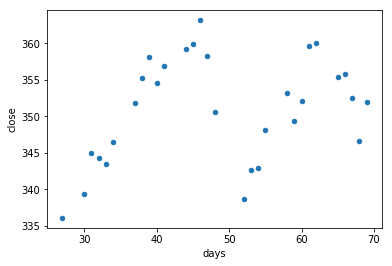

In [8]:
data.plot.scatter(x='days', y='close')

In [37]:
p = np.polyfit(data['days'], data['close'], 5)
p

array([-1.97919911e-05,  4.66447608e-03, -4.27249275e-01,  1.89446747e+01,
       -4.05027302e+02,  3.67749979e+03])

### 绘制多项式函数曲线

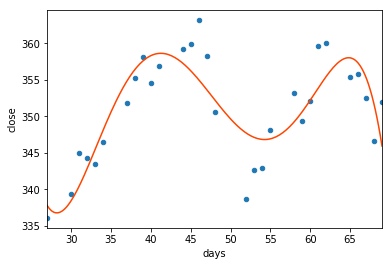

In [38]:
xs = np.linspace(data['days'].min(), data['days'].max(), 200)
ys = np.polyval(p, xs)
# 绘图：
data.plot.scatter(x='days', y='close')
polyline = pd.Series(ys, index=xs)
polyline.plot(c='orangered')

## 求多项式函数的驻点坐标

In [41]:
# 求多项式函数的导函数
q = np.polyder(p)
# 求导函数的根
xs = np.roots(q)
xs

array([64.81228477, 54.26409333, 41.25554414, 28.20802013])